# Linear Regression - Gradient Descent  

<img src="./images/gradientDescent_animation.gif" alt="Linear Regression w/Gradient Descent" width="600" align='center'/>

## The project is divided to 2 parts
* a simple dataset with 2 columns: 'attr','target'
  * It will be used for training 1D linear regression model
* An additional dataset, re: house prices
  * It will be used for training a multivariant linear regression model
* You will also need to implement other functions, such as a function for evaluation

## Dataset 1 - 2D dataset
* includes 2 columns: 
  * attr   - the attribute to use (a singe attribute x1 for every feature vector)
  * target - the actual value (y)  

In [1]:
# --------------------------------------------------------
# IMPORT (PACKAGES) CELL
# --------------------------------------------------------

# --------------------------------------------------------
# YOU MUST RUN THIS NOTEBOOK CELL
# --------------------------------------------------------

# --------------------------------------------------------
# - Do NOT change or delete the following imports:
import sys
import os
import pathlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import math
import random
get_ipython().run_line_magic('matplotlib', 'inline')
# --------------------------------------------------------


#### load the dataset 
<img src="./images/load_dataframe.jpg" alt="load dataframe" width="100" align='center'/>

In [2]:
# --------------------------------------------------------
# method name: trainTestSplit
# --------------------------------------------------------

# --------------------------------------------------------
# What does the method do?
# --- the method returns the dataset from the input csv file. 
# ------------
# input parameters:
# - 'fileName' - full path of the csv fileName 
# ------------
# return value:
# - a dataframe structure containing the dataset
# ---------------------
def loadDataset(fileName):
    return pd.read_csv(fileName)

#### split dataframe to X (feature vectors) and y (classes)

In [3]:
# --------------------------------------------------------
# method name: separateTo_X_and_y 
# --------------------------------------------------------

# --------------------------------------------------------
# The following is performed:
# ---- The method separates the input dataset into two parts:
# 1. X (feature vectors)  
# 2. y (categories) 
# ------------
# input parameters:
# - dataset -  a dataframe structure, containing the dataset.
# - classColName - the column name (string) containing the categories
# ------------
# return values (comma separated):
# - X_featureVectors  - a dataframe containing all feature vectors. 
#                       It should contain the input dataframe after removing the class column.
#                       The index of the X_featureVectores should be the same as the input dataframe parameter.
# - y_Categories      - a series of containing all class values per instance.
#                       The index of the y_Categories series should be the same as the input dataframe.
# ---------------------
def separateTo_X_and_y(dataset, classColName):
    X_Vectors = dataset.drop(classColName,axis=1)
    y_classes = dataset[classColName]
    return X_Vectors,y_classes

# --------------------------------------------------------
# method name: join_X_and_y 
# --------------------------------------------------------

# --------------------------------------------------------
# The following is performed:
# ---- The method joins the input X_featureVectors dataframe and y_categories series into one dataset.
# ------------
# input parameters:
# - X_featureVectors  - a dataframe containing all feature vectors. 
#                       The index of the X_featureVectores is expected to be the same as the y_Categories index.
# - y_Categories      - a series of containing all class values per instance.
# - classColName - the column name (string) containing the categories
# ------------
# return value:
# - dataset -  a dataframe structure of the joined inputs,containing the dataset with the same indexes as the input parametes.
# --------------------------------------------------------
def join_X_and_y(X_featureVectores, y_Categories,classColName):
    yCp = y_Categories.copy()
    yCp.name=classColName
    return pd.concat((X_featureVectores, yCp), axis=1)
# --------------------------------------------------------

#### split the dataset to a train-set and a test-set
<img src="./images/train-test-split.png" alt="train-test split" width="100" align='center'/>

In [4]:
# --------------------------------------------------------
# method name1: trainTestSplit
# --------------------------------------------------------

# --------------------------------------------------------
# What does the method do?
# --- the method split the input dataset into train and test. 
#     - It does so using the sklearn built in method
# ------------
# input parameters:
# - X_vectors - a dataframe containing all feature vectors. 
# - y_categories - a series of containing all class values per instance.
# - test_size_ratio - a number (0<number<1) of the wanted ratio of the dataset out of the dataset 
# - rand_state - a number, in order to guarantee reproducible results 
# ------------
# return values (comma separated):
# - X_train -  a dataframe containing all feature vectors of the train set
# - X_test -  a dataframe containing all feature vectors of the test set
# - y_train - a series of containing all class values per train instance
# - y_test - a series of containing all class values per test instance
# --------------------- 
def trainTestSplit(xInstances,yCategories,testRatio):
    instanceIndx = [indx for indx in range(len(xInstances))]
    random.shuffle(instanceIndx)
    testSize = testRatio * len(instanceIndx)
    trainIndxArr = list(instanceIndx)
    testIndxArr = list()
    while len(testIndxArr) < testSize:
        indx = random.randrange(len(trainIndxArr))
        testIndxArr.append(trainIndxArr.pop(indx))    
    return xInstances.iloc[trainIndxArr], xInstances.iloc[testIndxArr], yCategories.iloc[trainIndxArr], yCategories.iloc[testIndxArr]

## visualization:

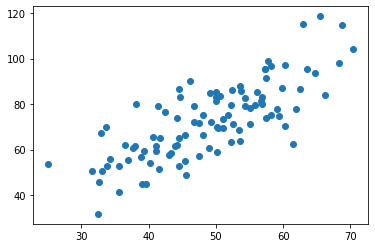

,attr,target
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:

df_1d_attr_target = loadDataset('.'+os.sep+'data'+os.sep+'2d_data.csv')
X_vectors, y_categories = separateTo_X_and_y(df_1d_attr_target, 'target')
plt.scatter(X_vectors, y_categories)
plt.show()
df_1d_attr_target.head()

In [6]:
df_1d_attr_target.describe()

,attr,target
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [7]:
random.seed(8)
splitSize=0.2
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)
xTrain

,attr
7,39.299567
61,50.186389
56,41.377727
43,43.870613
36,61.896223
...,...
5,55.142188
90,32.940480
24,51.845187
47,53.575078


## 1D linear regression with gradient descent  
<img src="./images/opt_momentum.png" alt="bagging-classifier" width="400" align='center'/>


## univariate (1D) linear regression with gradient descent
The following cells perform a few things:
* step 1 - univariate (linear regression) calculate yHat predictions
* step 2 - patial derivatives for w0, w1
* step 3 - univariate linear regression fit-2d
  * The test for univariate linear regression fit is test also via the predict method
* step 4 - gradient-descent-2d predict 

In [8]:
# --------------------------------------------------------
# method name: univariate_LinearRegression_calc_yHat
# --------------------------------------------------------

# --------------------------------------------------------
# The following is expected:
# --- the method needs to calculate the value of the y_hat using the univariate linear regression model y_hat=w0+w1*x1.
# ------------
# input parameters:
# - X_vectors - a dataframe containing all feature vectors for which we want to predict the y_hat values,
#               using the univariat (one feature) linear regression model
# - w0 - the w0 parameter of the linear regression model
# - w1 - the w1 parameter of the linear regression model
# ----
# notes: 
#       * when using the intermediate linear regression model, during training, wo=wo_prev, w1=w1_prev, X_vectors=X_train
#       * when using the trained linear regression model, during testing wo=wo_trained, w1=w1_trained, X_vectors=X_test 
# ------------
# return value:
# - y_hat - a series of the predictions for each input instance 
#  notes:
#        * the y_hat prediction vector could be of an intermediate model during training or 
#          for prediction of new examples during evaluation
# ---------------------

def univariate_LinearRegression_calc_yHat(X_vectors, w0, w1):
    y_hat=pd.Series(index=X_vectors.index)
    for x in X_vectors.index:
        y_hat[x]=w0+w1*X_vectors.loc[x]    
    return y_hat
    

show some model and how it fits the data:


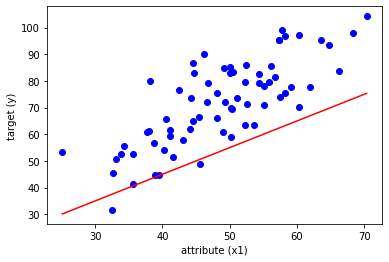

In [9]:
# Test of:
### --- visualization tests for the 'univariate_LinearRegression_calc_yHat' method 


def plotPointsAndLine(x1Series,y_Series,y_Hat):
    # Plot the values
    plt.scatter(x1Series, y_Series, c = 'b', marker='o')
    plt.xlabel('attribute (x1)')
    plt.ylabel('target (y)')

    plt.plot([min(x1Series), max(x1Series)], [min(y_Hat), max(y_Hat)], color='red') 

    plt.show()    
# --------------------------------------------------------

df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
yHat = None
# --------------------------------------------------------
random.seed(12)
splitSize=0.3
df_1d_attr_target = loadDataset('.'+os.sep+'data'+os.sep+'2d_data.csv')
X_vectors, y_categories = separateTo_X_and_y(df_1d_attr_target, 'target')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)

yHat = univariate_LinearRegression_calc_yHat(xTrain, 5, 1)

x1TrainSeries = xTrain.iloc[:,-1]
print('show some model and how it fits the data:')
plotPointsAndLine(x1TrainSeries,yTrain,yHat)

#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
#------------------------

In [10]:
# --------------------------------------------------------
# Test of:
### --- Graded tests for the 'univariate_LinearRegression_calc_yHat' method 
# --------------------------------------------------------
print ("check basic 'univariate_LinearRegression_calc_yHat' output validation ...")

random.seed(13)
splitSize=0.3
df_1d_attr_target = loadDataset('.'+os.sep+'data'+os.sep+'2d_data.csv')
X_vectors, y_categories = separateTo_X_and_y(df_1d_attr_target, 'target')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)

yHat = univariate_LinearRegression_calc_yHat(xTrain, 2, 1)
assert [int(val) for val in yHat.iloc[0:3]]==[37,37,53], 'wrong values from linear regression output'

print ("----> The 'univariate_LinearRegression_calc_yHat' test passed successfully :-) \n")
#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
#-------------------------

check basic 'univariate_LinearRegression_calc_yHat' output validation ...
----> The 'univariate_LinearRegression_calc_yHat' test passed successfully :-) 



#### partial derivatives for w0,w1 
* In the <b>value_of_partialDerivatives_w0_w1</b> function you need to calculate the value of the <u>partial derivatives</u> of <u>wo</u> and <u>w1</u>.
  * For each iteration we send the value of the prev w0 and w1 as input
    * at the 1st round we sent the initial w0 and w1
  * y_hat = wo_prev + w1_prev*x1
    * x1 - the value of feature 1 (w1 is it's coefficient)
    * the above is calculated for every example seperatly
  * The <u>partial derivative of w0</u> = 2 * average(sum{for each example}(y_hat-y))
  * The <u>partial derivative of w1</u> = 2 * average(sum{for each example}(y_hat-y)*x1)<br/>
<img src="./images/wo_w1_partial_derivatives.png" alt="wo_w1_partial_derivatives" width="300" align='left'/>


In [11]:
# --------------------------------------------------------
# method name: value_of_partialDerivatives_w0_w1
# --------------------------------------------------------

# --------------------------------------------------------
# The following is expected:
# --- the method needs to calculate the value of the partial derivatives of w0 and w1.
#     Note that the y_hat is calculated using 'univariate_LinearRegression_calc_yHat'
# ------------
# input parameters:
# - w0_prev - the w0 value from the previous iteration. If this is the first iteration w0_prev=w0 initial value
# - w1_prev - the w1 value from the previous iteration. If this is the first iteration w1_prev=w1 initial value
# - X_train - a dataframe containing all feature vectors of the train set.
# - y_train - a series of containing all class values per train instance.
# ------------
# return values (comma seperated):
# - value_of_w0_derivative - the value of the partial derivative w0
# - value_of_w1_derivative - the value of the partial derivative w1
# ---------------------

def value_of_partialDerivatives_w0_w1(w0_prev,w1_prev,X_train,y_train):
    size=len(X_train)
    value_of_w0_derivative=0
    value_of_w1_derivative=0
    for y in y_train.index:
        value_of_w0_derivative+= ((w0_prev + (w1_prev*X_train.loc[y])-y_train.loc[y])*1)
        value_of_w1_derivative+=((w0_prev + (w1_prev*X_train.loc[y])-y_train.loc[y])*X_train.loc[y]) 
    value_of_w0_derivative=((value_of_w0_derivative*2)/(size))
    value_of_w1_derivative=((value_of_w1_derivative*2)/(size))
    return (value_of_w0_derivative,value_of_w1_derivative)

In [12]:
# --------------------------------------------------------
# Test of:
### --- Graded tests for the 'value_of_partialDerivatives_w0_w1' method 
# Important Note: additional test might also be taken from our side.
# --------------------------------------------------------
print ("check basic 'value_of_partialDerivatives_w0_w1' output validation ...")

random.seed(12)
splitSize=0.3
df_1d_attr_target = loadDataset('.'+os.sep+'data'+os.sep+'2d_data.csv')
X_vectors, y_categories = separateTo_X_and_y(df_1d_attr_target, 'target')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)


w0_derivative, w1_derivative = value_of_partialDerivatives_w0_w1(1,1,xTrain,yTrain)
assert (int(w0_derivative/10), int(w1_derivative/100))==(-4,-22), 'wrong values for partial derivatives'
print ('\npartial derivative for wo: %f' %(w0_derivative))
print ('partial derivative for w1: %f\n' %(w1_derivative))
print ("----> The 'value_of_partialDerivatives_w0_w1' test passed successfully :-) \n")

#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
#-------------------------

check basic 'value_of_partialDerivatives_w0_w1' output validation ...

partial derivative for wo: -44.299468
partial derivative for w1: -2210.255529

----> The 'value_of_partialDerivatives_w0_w1' test passed successfully :-) 



#### gradient-descent-2d 
<img src="./images/gradient-descent-univariate.png" alt="gradient-descent-univariate.png" width="600" align='center'/>

In [13]:
# --------------------------------------------------------
# method name: univariateLinearRegression_fit
# --------------------------------------------------------

# --------------------------------------------------------
# The following is expected:
# --- trains a univariate (one feature) linear regression model, using the gradient descent algorithm and returns w0 and w1.
#     Note that the w0_derivative, w1_derivative are calculated,
#      using 'value_of_partialDerivatives_w0_w1' in each iteration
# ------------
# input parameters:
# - X_train - a dataframe containing all feature vectors of the train set.
# - y_train - a series of containing all class values per train instance.
# - w0_initiail - the initial value of w0 
# - w1_initiail - the initial value of w1
# - alpha - the learning rate
# - epochs - number of iterations to run gadient descent
# ------------
# return values (comma seperated):
# - w0 - the trained value of wo
# - w1 - the trained value of w1
# ---------------------

def univariateLinearRegression_fit(X_train,y_train,w0_initiail,w1_initiail,alpha,epochs):
    w0=w0_initiail
    w1=w1_initiail
    for x in range(epochs):
        w0_der,w1_der=value_of_partialDerivatives_w0_w1(w0,w1,X_train,y_train)
        w0=(w0-(alpha*w0_der))
        w1=(w1-(alpha*w1_der))
    return (w0,w1)
        

check basic 'univariateLinearRegression_fit' output validation ...

trained (1 epoch) wo,w1 = (0.001457,0.073312), plot on train points:


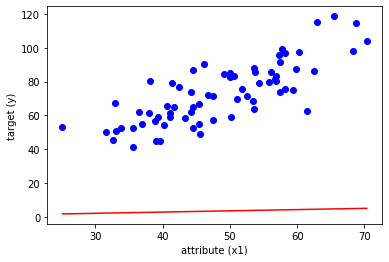

trained (10 epoch) wo,w1 = (0.011758,0.591249), plot on train points:


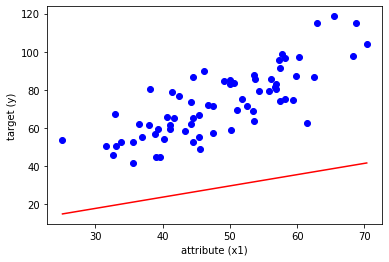

trained (100 epochs) wo,w1 = (0.931097,1.506268), plot on train points:


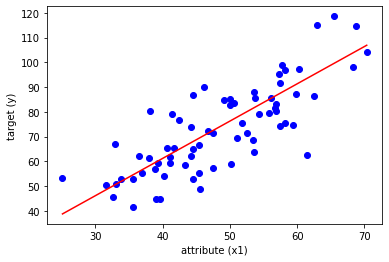


----> The 'univariateLinearRegression_fit' test passed successfully :-) 



In [14]:
# --------------------------------------------------------
# Test of:
### --- Graded tests for the 'univariateLinearRegression_fit' method 
# Important Note: additional test might also be taken from our side.

# --------------------------------------------------------
print ("check basic 'univariateLinearRegression_fit' output validation ...\n")

random.seed(13)
splitSize=0.3
df_1d_attr_target = loadDataset('.'+os.sep+'data'+os.sep+'2d_data.csv')
X_vectors, y_categories = separateTo_X_and_y(df_1d_attr_target, 'target')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)
x1TrainSeries = xTrain.iloc[:,-1]

trained_w0, trained_w1 = univariateLinearRegression_fit(xTrain,yTrain,0,0,0.00001,1)
assert (int(trained_w0*1000),int(trained_w1*1000))==(1,73), 'wrong values for univariateLinearRegression_fit'
print ('trained (1 epoch) wo,w1 = (%f,%f), plot on train points:' %(trained_w0, trained_w1))
yHat=univariate_LinearRegression_calc_yHat(xTrain, trained_w0, trained_w1)
plotPointsAndLine(x1TrainSeries,yTrain,yHat)

trained_w0, trained_w1 = univariateLinearRegression_fit(xTrain,yTrain,0,0,0.00001,10)
print ('trained (10 epoch) wo,w1 = (%f,%f), plot on train points:' %(trained_w0, trained_w1))
yHat=univariate_LinearRegression_calc_yHat(xTrain, trained_w0, trained_w1)
plotPointsAndLine(x1TrainSeries,yTrain,yHat)

trained_w0, trained_w1 = univariateLinearRegression_fit(xTrain,yTrain,1,5,0.00001,100)
assert (int(trained_w0*10),int(trained_w1*10))==(9,15), 'wrong values for univariateLinearRegression_fit'
print ('trained (100 epochs) wo,w1 = (%f,%f), plot on train points:' %(trained_w0, trained_w1))
yHat=univariate_LinearRegression_calc_yHat(xTrain, trained_w0, trained_w1)
plotPointsAndLine(x1TrainSeries,yTrain,yHat)

print ("\n----> The 'univariateLinearRegression_fit' test passed successfully :-) \n")
#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
trained_w0, trained_w1 = None,None
#-------------------------


### gradient-descent-2d predict

In [15]:
# --------------------------------------------------------
# ---- The method wraps the 'univariate_LinearRegression_calc_yHat' method and returns 
#      the linear regression predict on the test set.
# ------------
# input parameters:
# - X_test - a dataframe containing all test feature vectors for which we want to predict the y_hat values,
#               using the trained univariat (one feature) linear regression model
# - trained_w0 - the trained w0 parameter of the linear regression model
# - trained_w1 - the trained w1 parameter of the linear regression model
# ------------
# return value:
# - y_hat - a series of the predictions for each input test instance 
# ---------------------
def univariateLinearRegression_predict(X_test, trained_w0, trained_w1):
    return univariate_LinearRegression_calc_yHat(X_test, trained_w0, trained_w1)


check basic 'univariateLinearRegression_fit' (via predict) output validation ...

trained (1 epoch), plot on test points with train linear line:


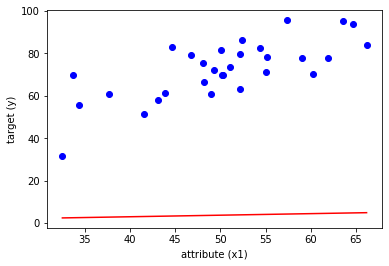

trained (10 epochs), plot on test points with train linear line:


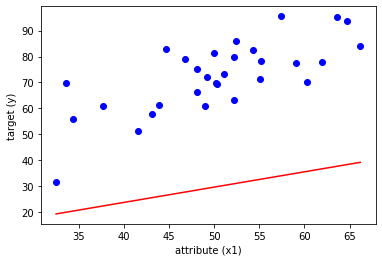

trained (100 epoch), plot on test points with train linear line:


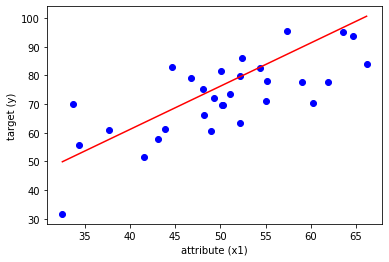


----> The 'univariateLinearRegression_fit' (via predict) test passed successfully :-) 

note: Additional Tests might be executed on our side


In [16]:
# --------------------------------------------------------
# Test of:
### --- Graded tests for the 'univariateLinearRegression_fit' method (via predict) 
# Important Note: additional test might also be taken from our side.

# --------------------------------------------------------
print ("check basic 'univariateLinearRegression_fit' (via predict) output validation ...\n")

random.seed(13)
splitSize=0.3
df_1d_attr_target = loadDataset('.'+os.sep+'data'+os.sep+'2d_data.csv')
X_vectors, y_categories = separateTo_X_and_y(df_1d_attr_target, 'target')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)
x1TestSeries = xTest.iloc[:,-1]

trained_w0, trained_w1 = univariateLinearRegression_fit(xTrain,yTrain,0,0,0.00001,1)
yHat=univariateLinearRegression_predict(xTest, trained_w0, trained_w1)
assert (int(yHat.iloc[1]*10),int(yHat.iloc[4]*10))==(36,30), 'wrong values for predict (1 epoch)'
print ('trained (1 epoch), plot on test points with train linear line:')
plotPointsAndLine(x1TestSeries,yTest,yHat)

trained_w0, trained_w1 = univariateLinearRegression_fit(xTrain,yTrain,0,0,0.00001,10)
yHat=univariateLinearRegression_predict(xTest, trained_w0, trained_w1)
print ('trained (10 epochs), plot on test points with train linear line:')
plotPointsAndLine(x1TestSeries,yTest,yHat)

trained_w0, trained_w1 = univariateLinearRegression_fit(xTrain,yTrain,1,5,0.00001,100)
yHat=univariateLinearRegression_predict(xTest, trained_w0, trained_w1)
assert (int(yHat.iloc[1]),int(yHat.iloc[3]))==(75,79), 'wrong values for predict (100 epoch)'
print ('trained (100 epoch), plot on test points with train linear line:')
plotPointsAndLine(x1TestSeries,yTest,yHat)

print ("\n----> The 'univariateLinearRegression_fit' (via predict) test passed successfully :-) \n")
#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
trained_w0, trained_w1 = None,None
#-------------------------


<img src='./images/multivariate-gradient_descent.png' alt="Drawing" style="width: 200x"/>

### Multivariat linear regression with gradient descent
The following cells perform a few things:
* step 1 - load house pricing dataset
* step 2 - calc mean and std t-distribution values of a dataframe 
* step 3 - scale and de-scale data using t-score (remove mean, divide std)
* step 4 - gradient-descent-multivariate
* step 5 - linear regression - multivariate - predict 
* step 6 - MSE - Mean Square Error 

## The Dataset - House pricing
<img src='./images/For-sale-sign.jpg' alt="Drawing" style="width: 200"/>

## Similar houses should be similar in price
Expected to share similar attributes:<br/>
* Square footage
* Number of bedrooms


displaying house pricing data: 



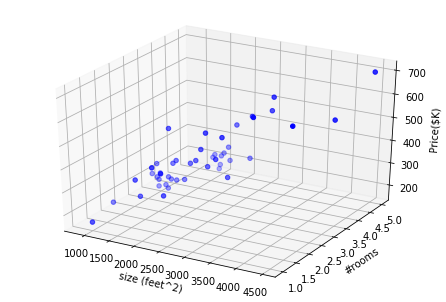

In [17]:
def plotPointsAndPricingLine(x_dataframe,y_Series,y_Hat):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)
    # Generate the values
    x1_vals = x_dataframe.iloc[:, 0]
    x2_vals = x_dataframe.iloc[:, 1]
    y_vals = y_Series.iloc[:]/1000

    ax.scatter(x1_vals, x2_vals, y_vals, c = 'b', marker='o')
    ax.set_xlabel('size (feet^2)')
    ax.set_ylabel('#rooms')
    ax.set_zlabel('Price($K)')
    
    if y_Hat is not None:
        ax.plot([min(x1_vals), max(x1_vals)], [min(x2_vals), max(x2_vals)],  [min(y_Hat/1000), max(y_Hat/1000)], color='red') 

    plt.show()
    
df_2d_attr_price = loadDataset('.'+os.sep+'data'+os.sep+'house_pricing_data_2attrs.csv')
X_vectors, y_categories = separateTo_X_and_y(df_2d_attr_price, 'price')
print ('displaying house pricing data: \n')
plotPointsAndPricingLine(X_vectors, y_categories,None) # y_categories)

#### scale and de-scale data using t-score (remove mean, divide std)
<img src="./images/var_std_in_sample.png" alt="var in sample" style="width: 250px;"/>  

In [18]:
# --------------------------------------------------------
# method name: t_distibution_mean_std
# --------------------------------------------------------

# --------------------------------------------------------
# The following is performed:
# --- get the mean and std of the series
# ------------
# input parameters:
# - series - the input series to be scaled
# ------------
# return values (comma separated):
# - mean_series - the mean value of the series 
# - std_series - the std value of the series (sample std as shown in the above figure, NOT population std)
# --------------------------------------------------------
def t_distibution_mean_std(series): 
    mean_series = series.mean()
    n_minus_1=series.shape[0]-1
    dist_from_mean = series-mean_series
    std_series  = math.sqrt((dist_from_mean*dist_from_mean).sum()/n_minus_1)
    return [mean_series,std_series]

# --------------------------------------------------------
# method name: t_distibution
# --------------------------------------------------------

# --------------------------------------------------------
# The following is performed:
# --- get a dataframe consisting of the mean and std of each column in the dataset.
# --- Notes: - the columns of the output dataframes correspond to the columns of the input dataframe
#            - the 1st and 2nd rows (indexes) consist of the mean and std respectivly.
#            - the std values consists of the sample std as shown in the above figure (and NOT the population std).
# ------------
# input parameters:
# - trainset - an input dataframe of the train set including both the X feature vectors and y categories to be scaled
#              note: that the distribution is calculated on the trainset only and used both for train and test sets
#                    for scaling.
# ------------
# return values (comma separated):
# - mean_std_dataframe - a dataframe including the mean and std for each column 
# --------------------------------------------------------
def t_distibution(trainset):
    mean_std_dataframe = pd.DataFrame(columns=trainset.columns,index=['mean','std'])
    for col in trainset.columns:
        mean_std_dataframe[col]=t_distibution_mean_std(trainset[col])
    return mean_std_dataframe

In [19]:
# --------------------------------------------------------
# Show the mean & std for each column, including the categories:
# --------------------------------------------------------

random.seed(13)
splitSize=0.3
df_house_pricing = loadDataset('.'+os.sep+'data'+os.sep+'house_pricing_data_2attrs.csv')
X_vectors, y_categories = separateTo_X_and_y(df_house_pricing, 'price')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)
train_set = join_X_and_y(xTrain, yTrain,'price')
mean_std_dataframe = t_distibution(train_set)

# 
print ("Note: the following mean and std t-distribution values could vary, and depened on the train sampeling.")
print ("\t\t please do not use the values themselves, but access values as shown as following:\n---------")
print ("the category's (price) std: %f \t--->access using: mean_std_dataframe['price']['std']" %(mean_std_dataframe['price']['std']))
print ("the 'bedroom's (number of bedrooms) mean: %f \t--->access using: mean_std_dataframe['bedroom']['mean']" %(mean_std_dataframe['bedroom']['mean']))
print ("---------\nthe mean & std of size (feet^2): \t--->access using: mean_std_dataframe['size']\n%r" %(mean_std_dataframe['size'])) 
print ("---------\nmean & std dataframe: \n")
print(mean_std_dataframe)

#--------------------------
df_house_pricing = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
train_set=None
mean_std_dataframe=None
#-------------------------

Note: the following mean and std t-distribution values could vary, and depened on the train sampeling.
		 please do not use the values themselves, but access values as shown as following:
---------
the category's (price) std: 117607.231119 	--->access using: mean_std_dataframe['price']['std']
the 'bedroom's (number of bedrooms) mean: 3.187500 	--->access using: mean_std_dataframe['bedroom']['mean']
---------
the mean & std of size (feet^2): 	--->access using: mean_std_dataframe['size']
mean    1920.718750
std      697.269755
Name: size, dtype: float64
---------
mean & std dataframe: 

             size   bedroom          price
mean  1920.718750  3.187500  330524.906250
std    697.269755  0.780302  117607.231119


#### scale and de-scale data using t-score scale

In [20]:
# --------------------------------------------------------
# method name: t_scale_dataframe
# --------------------------------------------------------

# --------------------------------------------------------
# The following is expected:
# --- scale a feature column, using the t-score scale. The t-distribution information is given as an input parameter.
#     The scaling needs to be done for every column in the input dataframe. The function should return
#     a dataframe with the same columns and indexes, but with the scaled values. 
# ------------
# input parameters:
# - dataset - an input dataframe including both the X feature vectors and y categories to be scaled
# - mean_std_dataframe - a dataframe including the mean and std for each column, to be used in scaling
# ------------
# return value:
# - scaled dataset -  a dataframe containing the same columns and indexes, but with the scaled values.
# ---------------------
def t_scale_dataframe(dataset,mean_std_dataframe):
    res_dataset=pd.DataFrame(index=dataset.index,columns=dataset.columns)
    for col in dataset.columns:
        standart_davision=mean_std_dataframe.loc['std',col]
        mean=mean_std_dataframe.loc['mean',col]
        res_dataset[col]=((dataset[col]-mean)/standart_davision)
    return(res_dataset)
    

In [21]:
# --------------------------------------------------------
# Test of:
### --- Graded tests for the 't_scale_dataframe' method
# --------------------------------------------------------


# --------------------------------------------------------
# method name: t_descale_attr
# ---------------------------
# The following is performed:
# --- de-scale (the opposite of scaling) the values of the input series, using the t-score scale.
# ------------
# input parameters:
# - scaled_series -  a series containing scaled values.
# - mean_std_series - a column from the mean_std_dataframe for descaling.
# ------------
# return value:
# - de_scaled_series - a seires with the same indexes as the input series, containg the descaled values
# --------------------------------------------------------
def t_descale_series(scaled_series,mean_std_series):
    return scaled_series*mean_std_series['std'] + mean_std_series['mean']
    
    
print ("check basic 't_scale_dataframe' output validation ...\n")
random.seed(17)
splitSize=0.3
df_house_pricing = loadDataset('.'+os.sep+'data'+os.sep+'house_pricing_data_2attrs.csv')
X_vectors, y_categories = separateTo_X_and_y(df_house_pricing, 'price')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)
train_set = join_X_and_y(xTrain, yTrain,'price')
test_set  = join_X_and_y(xTest, yTest,'price')
mean_std_dataframe = t_distibution(train_set)

scaled_dataset = t_scale_dataframe(train_set,mean_std_dataframe)
assert (int(scaled_dataset['price'].iloc[0]*10),int(scaled_dataset['price'].iloc[2]*10))==(2,-3), "wrong scaled train set 'price' values"

de_scaled_price_series = t_descale_series(scaled_dataset['price'],mean_std_dataframe['price'])
assert (int(de_scaled_price_series.iloc[0]/1000),int(de_scaled_price_series.iloc[2]/1000))==(369,299), "wrong descaled train set 'price' values"

print ('train price (head) values          ---> %r' %(train_set['price'].head().tolist()))
print ('train price scaled (head) values   ---> %s' %('['+','.join(['%7.3f...' %(price) for price in scaled_dataset['price'].head().tolist()]) +']'))
print ('train price descaled (head) values ---> %r' %(de_scaled_price_series.head().tolist()))
print ("-------------------------\n")

scaled_dataset = t_scale_dataframe(train_set,mean_std_dataframe)
assert (int(scaled_dataset['size'].iloc[0]*10),int(scaled_dataset['size'].iloc[2]*100))==(4,-5), "wrong scaled train set 'size' values"

de_scaled_size_series = t_descale_series(scaled_dataset['size'],mean_std_dataframe['size'])
assert (int(de_scaled_size_series.iloc[0]/100),int(de_scaled_size_series.iloc[2]/100))==(24,19), "wrong descaled train set 'size' values"

print ('train size (head) values          ---> %r' %(train_set['size'].head().tolist()))
print ('train size scaled (head) values   ---> %s' %('['+','.join(['%7.3f...' %(price) for price in scaled_dataset['size'].head().tolist()]) +']'))
print ('train size descaled (head) values ---> %r' %(de_scaled_size_series.head().tolist()))

print ("----------\n----> The 't_scale_dataframe' tests passed successfully :-) \n") 


#--------------------------
df_house_pricing = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
train_set,test_set = None,None
mean_std_dataframe = None
scaled_dataset,de_scaled_size_series = None,None
#-------------------------

check basic 't_scale_dataframe' output validation ...

train price (head) values          ---> [369000, 229900, 299900, 549000, 699900]
train price scaled (head) values   ---> [  0.208..., -0.892..., -0.338...,  1.631...,  2.824...]
train price descaled (head) values ---> [369000.0, 229900.0, 299900.0, 549000.0, 699900.0]
-------------------------

train size (head) values          ---> [2400, 1239, 1985, 4215, 4478]
train size scaled (head) values   ---> [  0.437..., -0.927..., -0.050...,  2.568...,  2.877...]
train size descaled (head) values ---> [2400.0, 1239.0, 1985.0, 4215.0, 4478.0]
----------
----> The 't_scale_dataframe' tests passed successfully :-) 



#### linear regression - multivariate - predict 

In [22]:
# --------------------------------------------------------
# method name: multivariateLinearRegression_predict
# --------------------------------------------------------

# --------------------------------------------------------
# The following is expected:
# ---- The method should calulate and return
#      the multivariate linear regression predict on the test set.
#   Note: normaly the 'multivariateLinearRegression_predict' should show the predictions on the test
#         feature vectors, but it could also be use as an intermediate step or to display a graph on training
# ------------
# input parameters:
# - x_featureVectors - a dataframe containing all feature vectors for which we want to predict the y_hat values,
#                       using the trained multivariate linear regression model
# - trained_w - the trained w vector linear regression paraneters.
#               Note: the 'trained_w' vector includes the the weight of w0,
#                     which is the weight in trained_w of the feature with the index 'attr0'.
#                     The rest of the weights have the index keys like the column names
#                     of the input x_featureVectors.
# ------------
# return value:
# - y_hat - a series of the predictions for each input feature vector instances
# --------------------------------------------------------
def multivariateLinearRegression_predict(x_featureVectors,trained_w):
    w0=trained_w.loc['attr0']
    wN=trained_w.drop('attr0')
    toInsert=0
    y_hat=pd.Series(index=x_featureVectors.index)
    for x in x_featureVectors.index:
        for i in wN.index:
            toInsert+=wN[i]*x_featureVectors.loc[x,i]
        toInsert+=w0
        y_hat.loc[x]=toInsert
        toInsert=0
    return y_hat

check basic 'multivariateLinearRegression_predict' output validation ...

displaying house pricing data
Note - the output linear regression line (based on the given w vector) is not optimal and is only used for testing: 



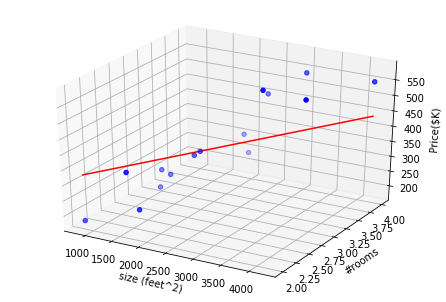


----> The 'multivariateLinearRegression_predict' tests passed successfully :-) 



In [23]:
# The following method returns an initialized weight series:
def initWeights(xTrain_columns,wieghtValueOrValues):
    featureNames = [col for col in xTrain_columns]
    featureNames.insert(0,'attr0')
    valArrs = wieghtValueOrValues
    if not isinstance(valArrs, list):
        val = wieghtValueOrValues
        if valArrs is None:
            val = 0
        valArrs = [val] * len(featureNames)    
    return pd.Series(valArrs,index=featureNames)

# --------------------------------------------------------
# Test of:
### --- Graded tests for the 'multivariateLinearRegression_predict' method 
# --------------------------------------------------------
print ("check basic 'multivariateLinearRegression_predict' output validation ...\n")

random.seed(13)
splitSize=0.3
df_house_pricing = loadDataset('.'+os.sep+'data'+os.sep+'house_pricing_data_2attrs.csv')
X_vectors, y_categories = separateTo_X_and_y(df_house_pricing, 'price')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)

train_set = join_X_and_y(xTrain, yTrain,'price')
test_set  = join_X_and_y(xTest, yTest,'price')
mean_std_dataframe = t_distibution(train_set)
scaled_trainset = t_scale_dataframe(train_set,mean_std_dataframe)
scaled_xTrain,scaled_yTrain = separateTo_X_and_y(scaled_trainset, 'price')
scaled_testset = t_scale_dataframe(test_set,mean_std_dataframe)
scaled_xTest,scaled_yTest = separateTo_X_and_y(scaled_testset, 'price')
wieghtValueOrValues = [300000, 30, 3000]
w = initWeights(xTrain.columns,wieghtValueOrValues)
yHat = multivariateLinearRegression_predict(xTest,w)
assert (int(yHat.iloc[0]/1000),int(yHat.iloc[2]/1000))==(402,370), 'wrong values for multivariateLinearRegression_predict'


print ("displaying house pricing data")
print ("Note - the output linear regression line (based on the given w vector) is not optimal and is only used for testing: \n")
plotPointsAndPricingLine(xTest, yTest,yHat) # y_categories)

print ("\n----> The 'multivariateLinearRegression_predict' tests passed successfully :-) \n")


#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
train_set,test_set = None,None
mean_std_dataframe = None
scaled_dataset,de_scaled_size_series = None,None
scaled_xTrain,scaled_yTrain = None,None
scaled_testset,scaled_xTest,scaled_yTest = None,None,None
scaled_trainset,scaled_xTrain,scaled_yTrain = None,None,None
#-------------------------

#### gradient-descent-multivariate fit 

In [24]:
# --------------------------------------------------------
# method name: multivariateLinearRegression_fit
# --------------------------------------------------------

# --------------------------------------------------------
# The following is expected:
# --- trains a multivariate (two or more features) linear regression model, 
#     using the gradient descent algorithm and returns the wight vector w.
#     Note that the w0_derivative, w1_derivative are calculated,
#      using 'value_of_partialDerivatives_w0_w1' in each iteration
# ------------
# input parameters:
# - X_train - a dataframe containing all feature vectors of the train set.
# - y_train - a series of containing all class values per train instance.
# - initial_w - the initial value of the w vector (w - w0, w1,w2,...) 
#           Note: the 'initial_w' vector is a series data structure. It includes the the weight of w0,
#                     which is the initial weight fo the w0 feature. It has with the index 'attr0'. 
#                     The rest of the initial weights have the index keys like the column names
#                     of the input X_train.
# - alpha - the learning rate
# - epochs - number of iterations to run multivariate gadient descent
# ------------
# return value:
# - trained_w - the values of the vector of weights (w) 
# ---------------------
def multivariateLinearRegression_fit(X_train,y_train,initial_w,alpha,epochs):
    #wj=wj-a*2/n*sum(w*xi-yi)*xij
    w=initial_w
    tempD=X_train
    counter=len(y_train)
    tempD['attr0']=1
    value_of_derivative=0
    for x in range(epochs):
        pred=multivariateLinearRegression_predict(X_train,w)
        for col in tempD.columns:
            for i in tempD[col].index:
                value_of_derivative+= ((pred.loc[i]-y_train.loc[i])*tempD.loc[i,col])
            value_of_derivative=((value_of_derivative*2)/counter)
            w.loc[col]=w.loc[col]-(alpha*value_of_derivative)
            value_of_derivative=0
    return (w)
        
        

check basic 'multivariateLinearRegression_fit' output validation ...

trained (1 epochs) w='[-2.7905605754091773e-18, 0.01633430948533689, 0.009134993859785844]', plot on test points: 



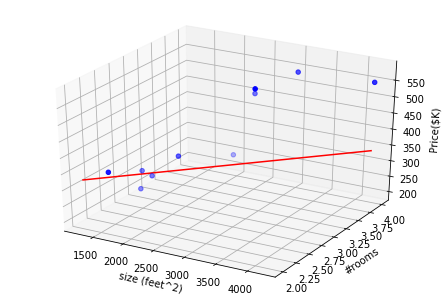

trained (100 epochs) w='[-1.5376588891058418e-16, 0.6426267151763873, 0.15356828416873067]', plot on test points:

         y           yHat
4   539900  459729.185290
14  259900  257659.463732
10  239999  350371.672420
35  249900  275094.765312
33  579900  450479.455765


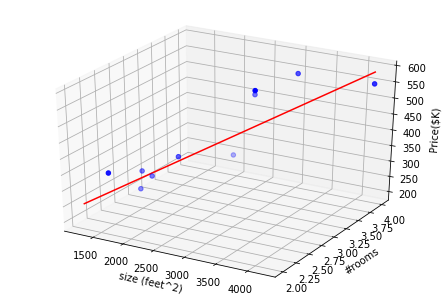


----> The 'multivariateLinearRegression_fit' test passed successfully :-) 



In [25]:
# --------------------------------------------------------
# Test of:
### --- Graded tests for the 'multivariateLinearRegression_fit' method 
# Important Note: additional test might also be taken from our side.

# --------------------------------------------------------
print ("check basic 'multivariateLinearRegression_fit' output validation ...\n")

random.seed(13)
splitSize=0.2
df_house_pricing = loadDataset('.'+os.sep+'data'+os.sep+'house_pricing_data_2attrs.csv')
X_vectors, y_categories = separateTo_X_and_y(df_house_pricing, 'price')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)

train_set = join_X_and_y(xTrain, yTrain,'price')
test_set  = join_X_and_y(xTest, yTest,'price')
mean_std_dataframe = t_distibution(train_set)
scaled_trainset = t_scale_dataframe(train_set,mean_std_dataframe)
scaled_xTrain,scaled_yTrain = separateTo_X_and_y(scaled_trainset, 'price')
scaled_testset = t_scale_dataframe(test_set,mean_std_dataframe)
scaled_xTest,scaled_yTest = separateTo_X_and_y(scaled_testset, 'price')
nWeights = xTrain.shape[1] + 1
initial_w = initWeights(xTrain.columns,0)
alpha = 0.01
epochs=1
trained_w = multivariateLinearRegression_fit(scaled_xTrain,scaled_yTrain,initial_w,alpha,epochs)
assert int(trained_w[1]*1000)==16, 'wrong values for multivariateLinearRegression_fit'
print ('trained (1 epochs) w=%r, plot on test points: \n' %(str(trained_w.tolist())))
yHat = multivariateLinearRegression_predict(scaled_xTest,trained_w)
de_scaled_yHat = t_descale_series(yHat,mean_std_dataframe['price'])
#y_yhat = pd.DataFrame({'y':yTest,'yHat':de_scaled_yHat})
plotPointsAndPricingLine(xTest, yTest,de_scaled_yHat)


initial_w = initWeights(xTrain.columns,0)
epochs=100
alpha = 0.01
trained_w = multivariateLinearRegression_fit(scaled_xTrain,scaled_yTrain,initial_w,alpha,epochs)
assert int(trained_w[2]*100)==15, 'wrong values for multivariateLinearRegression_fit'
print ('trained (100 epochs) w=%r, plot on test points:\n' %(str(trained_w.tolist())))
yHat = multivariateLinearRegression_predict(scaled_xTest,trained_w)
de_scaled_yHat = t_descale_series(yHat,mean_std_dataframe['price'])
y_yhat = pd.DataFrame({'y':yTest,'yHat':de_scaled_yHat})
print (y_yhat.head())
plotPointsAndPricingLine(xTest, yTest,de_scaled_yHat)
print ("\n----> The 'multivariateLinearRegression_fit' test passed successfully :-) \n") 
#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
trained_w0, trained_w1 = None,None
train_set,test_set = None,None
mean_std_dataframe = None
scaled_dataset,de_scaled_size_series = None,None
scaled_xTrain,scaled_yTrain = None,None
#-------------------------

#### MSE - Mean Square Error
<img src="./images/mse-explained.png" alt="bagging-classifier" width="300" align='center'/>

check basic 'multivariateLinearRegression_fit' output validation ...

trained (1 epochs) w='[-2.7905605754091773e-18, 0.01633430948533689, 0.009134993859785844]', plot on test points: 



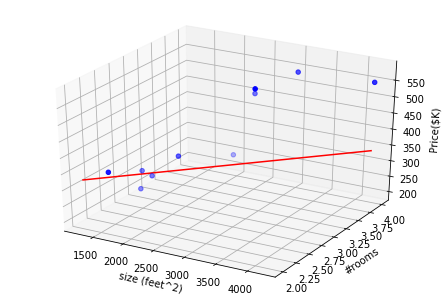

trained (100 epochs) w='[-1.5376588891058418e-16, 0.6426267151763873, 0.15356828416873067]', plot on test points:

         y           yHat
4   539900  459729.185290
14  259900  257659.463732
10  239999  350371.672420
35  249900  275094.765312
33  579900  450479.455765


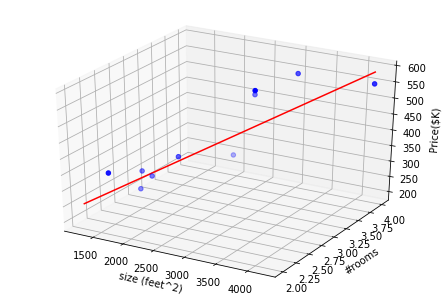


----> The 'multivariateLinearRegression_fit' test passed successfully :-) 



In [28]:
#--------------------------------------------------------
# Test of:
### --- Graded tests for the 'multivariateLinearRegression_fit' method 
# Important Note: additional test might also be taken from our side.

# --------------------------------------------------------
print ("check basic 'multivariateLinearRegression_fit' output validation ...\n")

random.seed(13)
splitSize=0.2
df_house_pricing = loadDataset('.'+os.sep+'data'+os.sep+'house_pricing_data_2attrs.csv')
X_vectors, y_categories = separateTo_X_and_y(df_house_pricing, 'price')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)

train_set = join_X_and_y(xTrain, yTrain,'price')
test_set  = join_X_and_y(xTest, yTest,'price')
mean_std_dataframe = t_distibution(train_set)
scaled_trainset = t_scale_dataframe(train_set,mean_std_dataframe)
scaled_xTrain,scaled_yTrain = separateTo_X_and_y(scaled_trainset, 'price')
scaled_testset = t_scale_dataframe(test_set,mean_std_dataframe)
scaled_xTest,scaled_yTest = separateTo_X_and_y(scaled_testset, 'price')
nWeights = xTrain.shape[1] + 1
initial_w = initWeights(xTrain.columns,0)
alpha = 0.01
epochs=1
trained_w = multivariateLinearRegression_fit(scaled_xTrain,scaled_yTrain,initial_w,alpha,epochs)
assert int(trained_w[1]*1000)==16, 'wrong values for multivariateLinearRegression_fit'
print ('trained (1 epochs) w=%r, plot on test points: \n' %(str(trained_w.tolist())))
yHat = multivariateLinearRegression_predict(scaled_xTest,trained_w)
de_scaled_yHat = t_descale_series(yHat,mean_std_dataframe['price'])
y_yhat = pd.DataFrame({'y':yTest,'yHat':de_scaled_yHat})
plotPointsAndPricingLine(xTest, yTest,de_scaled_yHat)


initial_w = initWeights(xTrain.columns,0)
epochs=100
alpha = 0.01
trained_w = multivariateLinearRegression_fit(scaled_xTrain,scaled_yTrain,initial_w,alpha,epochs)
assert int(trained_w[2]*100)==15, 'wrong values for multivariateLinearRegression_fit'
print ('trained (100 epochs) w=%r, plot on test points:\n' %(str(trained_w.tolist())))
yHat = multivariateLinearRegression_predict(scaled_xTest,trained_w)
de_scaled_yHat = t_descale_series(yHat,mean_std_dataframe['price'])
y_yhat = pd.DataFrame({'y':yTest,'yHat':de_scaled_yHat})
print (y_yhat.head())
plotPointsAndPricingLine(xTest, yTest,de_scaled_yHat)
print ("\n----> The 'multivariateLinearRegression_fit' test passed successfully :-) \n")
#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
trained_w0, trained_w1 = None,None
train_set,test_set = None,None
mean_std_dataframe = None
scaled_dataset,de_scaled_size_series = None,None
scaled_xTrain,scaled_yTrain = None,None
#-------------------------


# ------------------------------------------

In [29]:
# --------------------------------------------------------
# method name: calc_mse
# --------------------------------------------------------

# --------------------------------------------------------
# The following is expected:
# --- check the MSE (mean squared error) as shown in the above image,
#     for running the predicted linear regression values compared to the actual test values
# ------------
# input parameters:
# - y          - the actual expected values
# - yPredicted - the predicted expected values
# ------------
# return value:
# - mse (mean squared error) value
# --------------------------------------------------------
def calc_mse(y,yPredicted):
    size=len(y)
    mse=0
    for i in y.index:
        mse+=(y.loc[i]-yPredicted.loc[i])**2
    mse=mse/size
    return mse

check basic 'calc_mse' output validation ...
trained (10 epochs) mse_descaled (mse in square k$): 6219.3
trained (10 epochs) mse_scaled: 0.372
trained (10 epochs) w='[1.368274862781274e-17, 0.3508440475630127, 0.17973461012350045]', plot on test points: 



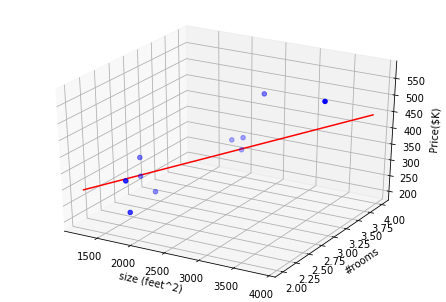

trained (100 epochs) w='[9.199848090542522e-17, 0.8339497032353298, -0.009645315416685653]', plot on test points:

trained (100 epochs)mse_descaled (mse in square k$): 2853.6
trained (100 epochs)mse_scaled: 0.171


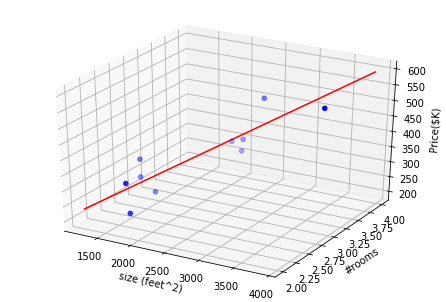

----> The 'calc_mse' test passed successfully :-) 



In [30]:
# --------------------------------------------------------
# Test of:
### --- Graded tests for the 'calc_mse' method 
# Important Note: additional test might also be taken from our side.
# --------------------------------------------------------
print ("check basic 'calc_mse' output validation ...")

random.seed(15)
splitSize=0.2
df_house_pricing = loadDataset('.'+os.sep+'data'+os.sep+'house_pricing_data_2attrs.csv')
X_vectors, y_categories = separateTo_X_and_y(df_house_pricing, 'price')
xTrain,xTest,yTrain,yTest = trainTestSplit(X_vectors, y_categories,splitSize)

train_set = join_X_and_y(xTrain, yTrain,'price')
test_set  = join_X_and_y(xTest, yTest,'price')
mean_std_dataframe = t_distibution(train_set)
scaled_trainset = t_scale_dataframe(train_set,mean_std_dataframe)
scaled_xTrain,scaled_yTrain = separateTo_X_and_y(scaled_trainset, 'price')
scaled_testset = t_scale_dataframe(test_set,mean_std_dataframe)
scaled_xTest,scaled_yTest = separateTo_X_and_y(scaled_testset, 'price')

nWeights = xTrain.shape[1] + 1
initial_w = initWeights(xTrain.columns,0)
alpha = 0.03
epochs=10
trained_w = multivariateLinearRegression_fit(scaled_xTrain,scaled_yTrain,initial_w,alpha,epochs)
yHat = multivariateLinearRegression_predict(scaled_xTest,trained_w)
de_scaled_yHat = t_descale_series(yHat,mean_std_dataframe['price'])
# calculate mse in k$:
mse_descaled = calc_mse(yTest/1000,de_scaled_yHat/1000)
mse_scaled   = calc_mse(scaled_yTest,yHat)
assert int(mse_descaled)==6219, 'wrong values for calc_mse'
print('trained (10 epochs) mse_descaled (mse in square k$): %5.1f' %(mse_descaled))
print('trained (10 epochs) mse_scaled: %5.3f' %(mse_scaled))
print ('trained (10 epochs) w=%r, plot on test points: \n' %(str(trained_w.tolist())))
plotPointsAndPricingLine(xTest, yTest,de_scaled_yHat)


initial_w = initWeights(xTrain.columns,0)
epochs=100
alpha = 0.03
trained_w = multivariateLinearRegression_fit(scaled_xTrain,scaled_yTrain,initial_w,alpha,epochs)
yHat = multivariateLinearRegression_predict(scaled_xTest,trained_w)
de_scaled_yHat = t_descale_series(yHat,mean_std_dataframe['price'])
# calculate mse in k$:
mse_descaled = calc_mse(yTest/1000,de_scaled_yHat/1000)
mse_scaled   = calc_mse(scaled_yTest,yHat)
assert int(mse_descaled)==2853, 'wrong values for calc_mse'
print ('trained (100 epochs) w=%r, plot on test points:\n' %(str(trained_w.tolist())))
print('trained (100 epochs)mse_descaled (mse in square k$): %5.1f' %(mse_descaled))
print('trained (100 epochs)mse_scaled: %5.3f' %(mse_scaled))

plotPointsAndPricingLine(xTest, yTest,de_scaled_yHat)

# -------
print ("----> The 'calc_mse' test passed successfully :-) \n")

#--------------------------
df_1d_attr_target = None
X_vectors, y_categories = None,None
xTrain,xTest,yTrain,yTest = None,None,None,None
x1TrainSeries,yHat = None,None
#-------------------------